In [1]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.kymo_class import *
from scipy.signal import find_peaks
import os
from pathlib import Path
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm import tqdm
from tifffile import imwrite

%matplotlib widget
%load_ext autoreload
%autoreload 2

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
path_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\TRANSPORT\PositionsNetworks\PositionsSpeeds\csv_new"
paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
places = [path.split('.')[0] for path in os.listdir(path_root) if path.split('.')[-1]=='csv']


In [3]:
path_all = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\TRANSPORT\PositionsNetworks\PositionsSpeeds\AllSpeeds"
table_speeds = pd.DataFrame()

for i,path in enumerate(paths):
    table_loc = pd.read_csv(os.path.join(path_root,path))
    table_loc['csv_id'] = path
    
    table_loc['days'] = table_loc['time_since_crossing']/pd.Timedelta(days=1)
    
    for j in range(len(table_loc)):
        kymo_id = table_loc['kymo_id'].iloc[j]
        path_subtable = os.path.join(path_all,places[i],f'{places[i]}_kymoID{kymo_id}.csv')
        try:
            subtable = pd.read_csv(path_subtable,sep=',').transpose()
            subtable['folder'] = table_loc['folder'].iloc[j]
            subtable['kymo_id'] = table_loc['kymo_id'].iloc[j]
            subtable['speed'] = subtable.index   
            subtable['speed'] = subtable['speed'].astype(float)
            subtable['tot_num_spore'] = table_loc['tot_num_spore'].iloc[j]
            subtable['days'] = table_loc['days'].iloc[j]
            subtable['unique_id'] = table_loc['unique_id'].iloc[j]
            subtable['csv_id'] = table_loc['csv_id'].iloc[j]
            
            # subtable['std_speed+']= np.std(subtable.loc[subtable['speed']>0]["speed"])
            # subtable['std_speed-']= np.std(subtable.loc[subtable['speed']<0]["speed"])
            # subtable['count+']= len(subtable.loc[subtable['speed']>0]["speed"])
            # subtable['count-']= len(subtable.loc[subtable['speed']<0]["speed"])
            table_speeds = pd.concat([table_speeds,subtable])
        except:
            continue


In [4]:
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\rebuttal\Figures_rebutal\AllVelocities"

In [5]:
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

# Create a list to store DataFrames
dataframes = []

# Loop through the CSV files, read them into DataFrames, and append to the list
for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path,sep=",",header=None).transpose()
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
final_dataframe = pd.concat(dataframes, ignore_index=True)

In [6]:
plt.style.use('presentation.mplstyle')
path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'


Text(0.5, 0, 'speed ($\\mu m.s-1$)')

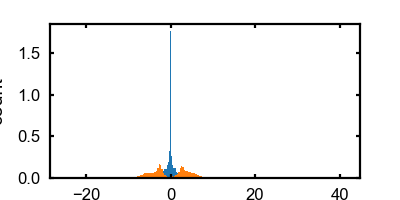

In [7]:
select = final_dataframe[abs(final_dataframe[0])>0]
fig,ax =plt.subplots(figsize = (2.,1))
ax.hist(select[0],200,density=True)
ax.hist(table_speeds['speed'],200,density = True)

ax.set_ylabel("count")
ax.set_xlabel("speed ($\mu m.s-1$)")
# ax.set_yscale('log')
# plt.savefig(os.path.join(path_figure,'myr_flow.pdf'), transparent=True, bbox_inches='tight')

Symbiotic N= 71009
Myristate N= 2450
2024-05-21 10:12:54,119-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-21 10:12:54,138-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-21 10:12:54,140-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-21 10:12:54,141-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-21 10:12:54,142-[INFO]- fontTools.subset:2799 -> FFTM dropped
2024-05-21 10:12:54,148-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-21 10:12:54,159-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-21 10:12:54,161-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-21 10:12:54,182-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-21 10:12:54,185-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-21 10:12:54,186-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subset
2024-05-21 10:12:54,187-[INFO]- fontTools.subset:2867 -> Closing glyph list over 'GSUB': 7 glyphs before
2024-05-21 10:12:54,188-[INFO]- fontTools.subset:446 -> Glyph name

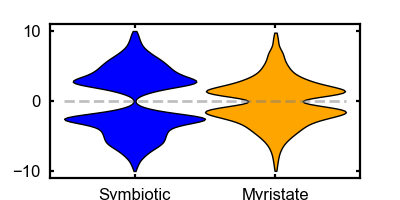

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_dataframe' and 'table_speeds' are predefined dataframes
# and 'final_dataframe[0]' and 'table_speeds['speed']' are the columns of interest

# Filter the data
select = final_dataframe[abs(final_dataframe[0]) > 0]
select = select[abs(select[0]) <= 10]

select2 = table_speeds[abs(table_speeds['speed']) <=10]


# Prepare the data for seaborn
# We create a single DataFrame with all values and an identifying label
data_for_plotting = pd.concat([
    pd.DataFrame({
        'Speed': select2['speed'],
        'Type': 'Symbiotic'
    }),
    pd.DataFrame({
        'Speed': select[0],
        'Type': 'Myristate'
    })
])
data_for_plotting = data_for_plotting[abs(data_for_plotting['Speed']) >0.8]

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(2, 1))  # Adjusted figure size for clarity
colors = ['blue','orange']
types = data_for_plotting['Type'].unique()
for i,treatment in enumerate(types):
    select = data_for_plotting[data_for_plotting['Type']==treatment]
    print(treatment,"N=",len(select))
# Create violin plots
    parts = ax.violinplot(select['Speed'],[i], showextrema=False,widths = 1)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_linewidth(0.5)  # Set the width of the edge (line) around the violin body
# Setting labels and titles if necessary
ax.set_xlabel("")
ax.set_ylabel("Speed ($\mu m.s^{-1}$)")
ax.hlines(0,-0.5,1.5,color='grey',linestyle='--',alpha = 0.5)
ax.set_xticks(range(len(types)))
ax.set_xticklabels(types)
# Optionally save the figure
plt.savefig(os.path.join(path_figure,'myr_flow.pdf'), transparent=True, bbox_inches='tight')



In [9]:
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\rebuttal\Figures_rebutal\AllVelocities\kymo.tiff"
kymo = imageio.imread(path)

In [10]:
def create_paved_kymograph(kymo):
    height, width = kymo.shape

    # Duplicate and manipulate images
    subFourier1 = kymo.copy()
    subFourier2 = cv2.flip(kymo, 1)  # Flip horizontally
    subFourier3 = cv2.flip(subFourier2, 0)  # Flip vertically after horizontal
    subFourier4 = cv2.flip(kymo, 0)  # Flip vertically

    # Create a larger image and place manipulated images accordingly
    filter_forward = np.zeros((3 * height, 3 * width), dtype=kymo.dtype)
    filter_forward[height:2*height, width:2*width] = subFourier1
    filter_forward[height:2*height, 0:width] = subFourier2
    filter_forward[height:2*height, 2*width:3*width] = subFourier2
    filter_forward[0:height, 0:width] = subFourier3
    filter_forward[0:height, 2*width:3*width] = subFourier3
    filter_forward[2*height:3*height, 0:width] = subFourier3
    filter_forward[2*height:3*height, 2*width:3*width] = subFourier3
    filter_forward[0:height, width:2*width] = subFourier4
    filter_forward[2*height:3*height, width:2*width] = subFourier4
    return filter_forward
    
def apply_fourier_operations(tiled_image):
    dft = np.fft.fftshift(np.fft.fft2(tiled_image))  # Apply FFT and shift zero frequency to center
    # Zero out specific regions in the Fourier transform
    h, w = dft.shape
    # Horizontal line across the middle
    dft[h//2-1:h//2+1, :] = 0
    # Top-left quadrant
    dft[:h//2, :w//2] = 0
    # botom-right quadrant
    dft[h//2:, w//2:] = 0
    
    # Inverse Fourier Transform
    inverse_dft = np.fft.ifft2(np.fft.ifftshift(dft)).real

    return inverse_dft

def filter_kymo_left(kymo):
    height, width = kymo.shape
    paved_kymo = create_paved_kymograph(kymo)
    paved_kymo_filter = apply_fourier_operations(paved_kymo)
    paved_kymo = create_paved_kymograph(kymo)
    filtered_kymo = paved_kymo_filter[height:2*height, width:2*width]
    filtered_kymo -= np.percentile(filtered_kymo,10)
    # filtered_kymo[np.where(filtered_kymo<0)] =0
    
    return(filtered_kymo)
    
def filter_kymo_right(kymo):
    return(np.flip(filter_kymo_left(np.flip(kymo, axis=1)), axis=1))

2024-05-21 10:12:13,659-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-21 10:12:13,682-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-21 10:12:13,690-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-21 10:12:13,690-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-21 10:12:13,693-[INFO]- fontTools.subset:2799 -> FFTM dropped
2024-05-21 10:12:13,699-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-21 10:12:13,707-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-21 10:12:13,709-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-21 10:12:13,726-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-21 10:12:13,729-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-21 10:12:13,731-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subset
2024-05-21 10:12:13,732-[INFO]- fontTools.subset:2867 -> Closing glyph list over 'GSUB': 6 glyphs before
2024-05-21 10:12:13,733-[INFO]- fontTools.subset:446 -> Glyph names: ['.notdef', '.null', 'm', 'nonmark

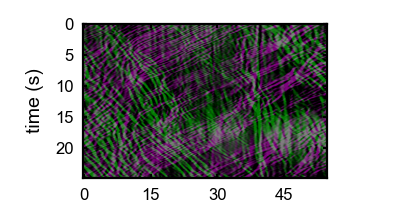

In [11]:
def blend_images(img1, img2):
    # Extract RGB components and ignore the alpha channel
    img1_rgb = img1[:, :, :3]
    img2_rgb = img2[:, :, :3]
    # Blend the images by averaging the RGB values
    blended_rgb = (img1_rgb + img2_rgb) / 2
    # Combine blended RGB with full alpha channel
    return blended_rgb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import Normalize, LinearSegmentedColormap
pixel_size = 1.725/25
pixel_size_time = 1/20
# Filter the kymograph for left and right
filtered_left = filter_kymo_left(kymo)
filtered_right = filter_kymo_right(kymo)

# Get the colormap instances
colors = [(0, 0, 0), (0, 1, 0)]  # Black to red
n_bins = 100  # Number of bins
cmap_reds = LinearSegmentedColormap.from_list("sdv", colors, N=n_bins)
colors = [(0, 0, 0), (1, 0, 1)]  # Black to red

cmap_greens = LinearSegmentedColormap.from_list("dvd", colors, N=n_bins)
# Apply the colormap (including normalization) to create RGBA images
norm = Normalize(vmin=np.percentile(-filtered_left, 20), vmax=np.percentile(-filtered_left, 90))
img_left = cmap_reds(norm(-filtered_left))
norm = Normalize(vmin=np.percentile(-filtered_right, 20), vmax=np.percentile(-filtered_right, 90))
img_right = cmap_greens(norm(-filtered_right))

# Blend the images
blended_img = blend_images(img_left, img_right)

# Plotting the resulting image
fig, ax = plt.subplots(figsize=(2, 1))
ax.imshow(blended_img)
num_cols_left = img_left.shape[1]  # assuming image data in numpy array format
ticks = np.arange(0, num_cols_left, int(1/pixel_size*15))  # change 25 to whatever number of pixels you want between ticks
tick_labels = [f"{pixel * pixel_size:.0f}" for pixel in ticks]  # formatting labels to 2 decimal places

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
num_cols_left = img_left.shape[0]  # assuming image data in numpy array format
ticks = np.arange(0, num_cols_left, int(1/pixel_size_time)*5)  # change 25 to whatever number of pixels you want between ticks
tick_labels = [f"{pixel * pixel_size_time:.0f}" for pixel in ticks]  # formatting labels to 2 decimal places

ax.set_yticks(ticks,color="white")
ax.set_yticklabels(tick_labels)
ax.set_ylabel('time (s)')
ax.set_xlabel('spatial coordinate ($\mu m$)')
plt.savefig(os.path.join(path_figure,'myr_flow_kymo.pdf'), transparent=True, bbox_inches='tight',dpi = 500)
# plt.tight_layout()

In [12]:
int(1/pixel_size_time*30)

600

In [13]:
cmap_reds(0)

(0.0, 0.0, 0.0, 1.0)